# Nodes

## This notebook is used to get information about Ripple nodes

### 0. Preliminaries
Import the right libraries.

In [1]:
import urllib.request
import json
import collections
import numpy as np
import operator

from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

We use the Ripple Data API

In [2]:
from ripple_api import RippleDataAPIClient,RippleRPCClient
api = RippleDataAPIClient('https://data.ripple.com')

### 1. Nodes
We get the data from the API

In [3]:
nodes = api.get_topology()['nodes']

In [4]:
print('There are',len(nodes),'known nodes.')

There are 1033 known nodes.


In [5]:
#This method return the country name for a given IP address
def get_country_name(ip):
    with urllib.request.urlopen("https://geoip-db.com/jsonp/"+ip) as url:
        answer = url.read().decode()[9:-1] #remove first 9 char and the last of answer to be read to convert to dict
        answer = json.loads(answer)
        return answer['country_name']

In [6]:
node_to_count = {}
for node in tqdm(nodes):
    if 'ip' in node.keys():
        country = get_country_name(node['ip'])
        node_to_count[country] = node_to_count.get(country,0) + 1
del node_to_count[None] #remove requests that failed

In [7]:
node_to_count = collections.OrderedDict(sorted(node_to_count.items(),key=operator.itemgetter(1),reverse = False)) #sort by counts

In [8]:
node_to_count

OrderedDict([('Romania', 1),
             ('Kenya', 1),
             ('Serbia', 1),
             ('Taiwan', 1),
             ('Malaysia', 1),
             ('Latvia', 1),
             ('New Zealand', 1),
             ('Republic of Lithuania', 1),
             ('Italy', 1),
             ('Estonia', 1),
             ('Poland', 1),
             ('Belarus', 1),
             ('Portugal', 1),
             ('Slovakia', 1),
             ('Iran', 1),
             ('Bulgaria', 1),
             ('United Arab Emirates', 1),
             ('Georgia', 1),
             ('Luxembourg', 2),
             ('Denmark', 2),
             ('South Africa', 2),
             ('Norway', 2),
             ('Not found', 2),
             ('Ukraine', 3),
             ('Vietnam', 3),
             ('Turkey', 3),
             ('Slovenia', 4),
             ('India', 5),
             ('Brazil', 6),
             ('Russia', 7),
             ('Switzerland', 8),
             ('Australia', 9),
             ('United Kingdom', 10),


The next cell plots the nodes repartion as a stacked-bar

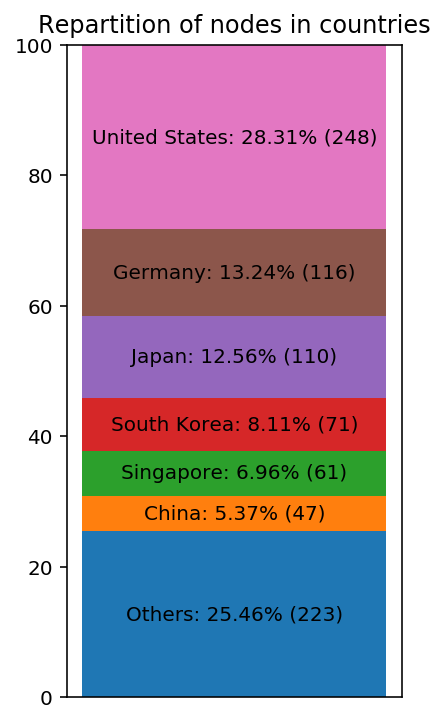

In [9]:
plt.figure(figsize=(3,6))

nb_nodes = sum(list(node_to_count.values()))
bars_previous=0 #where to start from (to stack the bar)
others = 0
ploted_others = False

for country,count in tqdm(node_to_count.items()):
    bar = count/nb_nodes*100
    
    if(bar < 4):
        others+= bar #if less than 4% add to 'others'
   
    else:
        if(not ploted_others):
            ploted_others = True
            plt.bar(0,others)
            plt.text(0,0.5*others,'Others: %1.2f' %others+'% '+'(%1.0f' %(others/100*nb_nodes)+')',horizontalalignment='center',verticalalignment='center')
        plt.bar(0,bar,bottom = bars_previous)
        plt.text(0,bars_previous+0.5*bar,country+": %1.2f"% bar+'% '+'('+str(count)+')',horizontalalignment='center',verticalalignment='center')
        
    bars_previous+= bar

plt.ylim(0, 100)
plt.xticks([])
plt.title('Repartition of nodes in countries')
plt.savefig('../visualisations/Repartiton_of_nodes.png',dpi = 255)
plt.show()